In [1]:
# Import and setups
import time
import numpy as np
import matplotlib.pyplot as plt
from nndl.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set dflt size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  # returns relative error
  den = np.maximum(1e-8, np.abs(x) + np.abs(y))
  return np.max(np.abs(x - y) / den)


In [2]:
# Load the (preprocessed) CIFAR10 data
data = get_CIFAR10_data()
for k in data.keys():
  print('{}: {}'.format(k, data[k].shape))

X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']


X_train: (49000, 3, 32, 32)
y_train: (49000,)
X_val: (1000, 3, 32, 32)
y_val: (1000,)
X_test: (1000, 3, 32, 32)
y_test: (1000,)


In [85]:
'''
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)
'''

'\n# Subsample the data for more efficient code execution in this exercise\nnum_training = 5000\nmask = list(range(num_training))\nX_train = X_train[mask]\ny_train = y_train[mask]\n\nnum_test = 500\nmask = list(range(num_test))\nX_test = X_test[mask]\ny_test = y_test[mask]\n\n# Reshape the image data into rows\nX_train = np.reshape(X_train, (X_train.shape[0], -1))\nX_test = np.reshape(X_test, (X_test.shape[0], -1))\nprint(X_train.shape, X_test.shape)\n'

In [6]:
from nndl.optim import sgd_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print('next_w error: {}'.format(rel_error(next_w, expected_next_w)))
print('velocity error: {}'.format(rel_error(expected_velocity, config['velocity'])))


next_w error: 8.882347033505819e-09
velocity error: 4.269287743278663e-09


In [7]:
from nndl.optim import sgd_nesterov_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_nesterov_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [0.08714,      0.15246105,  0.21778211,  0.28310316,  0.34842421],
  [0.41374526,   0.47906632,  0.54438737,  0.60970842,  0.67502947],
  [0.74035053,   0.80567158,  0.87099263,  0.93631368,  1.00163474],
  [1.06695579,   1.13227684,  1.19759789,  1.26291895,  1.32824   ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579,  0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print('next_w error: {}'.format(rel_error(next_w, expected_next_w)))
print('velocity error: {}'.format(rel_error(expected_velocity, config['velocity'])))


next_w error: 1.0875186845081027e-08
velocity error: 4.269287743278663e-09


Optimizing with sgd
Optimizing with sgd_momentum
Optimizing with sgd_nesterov_momentum


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


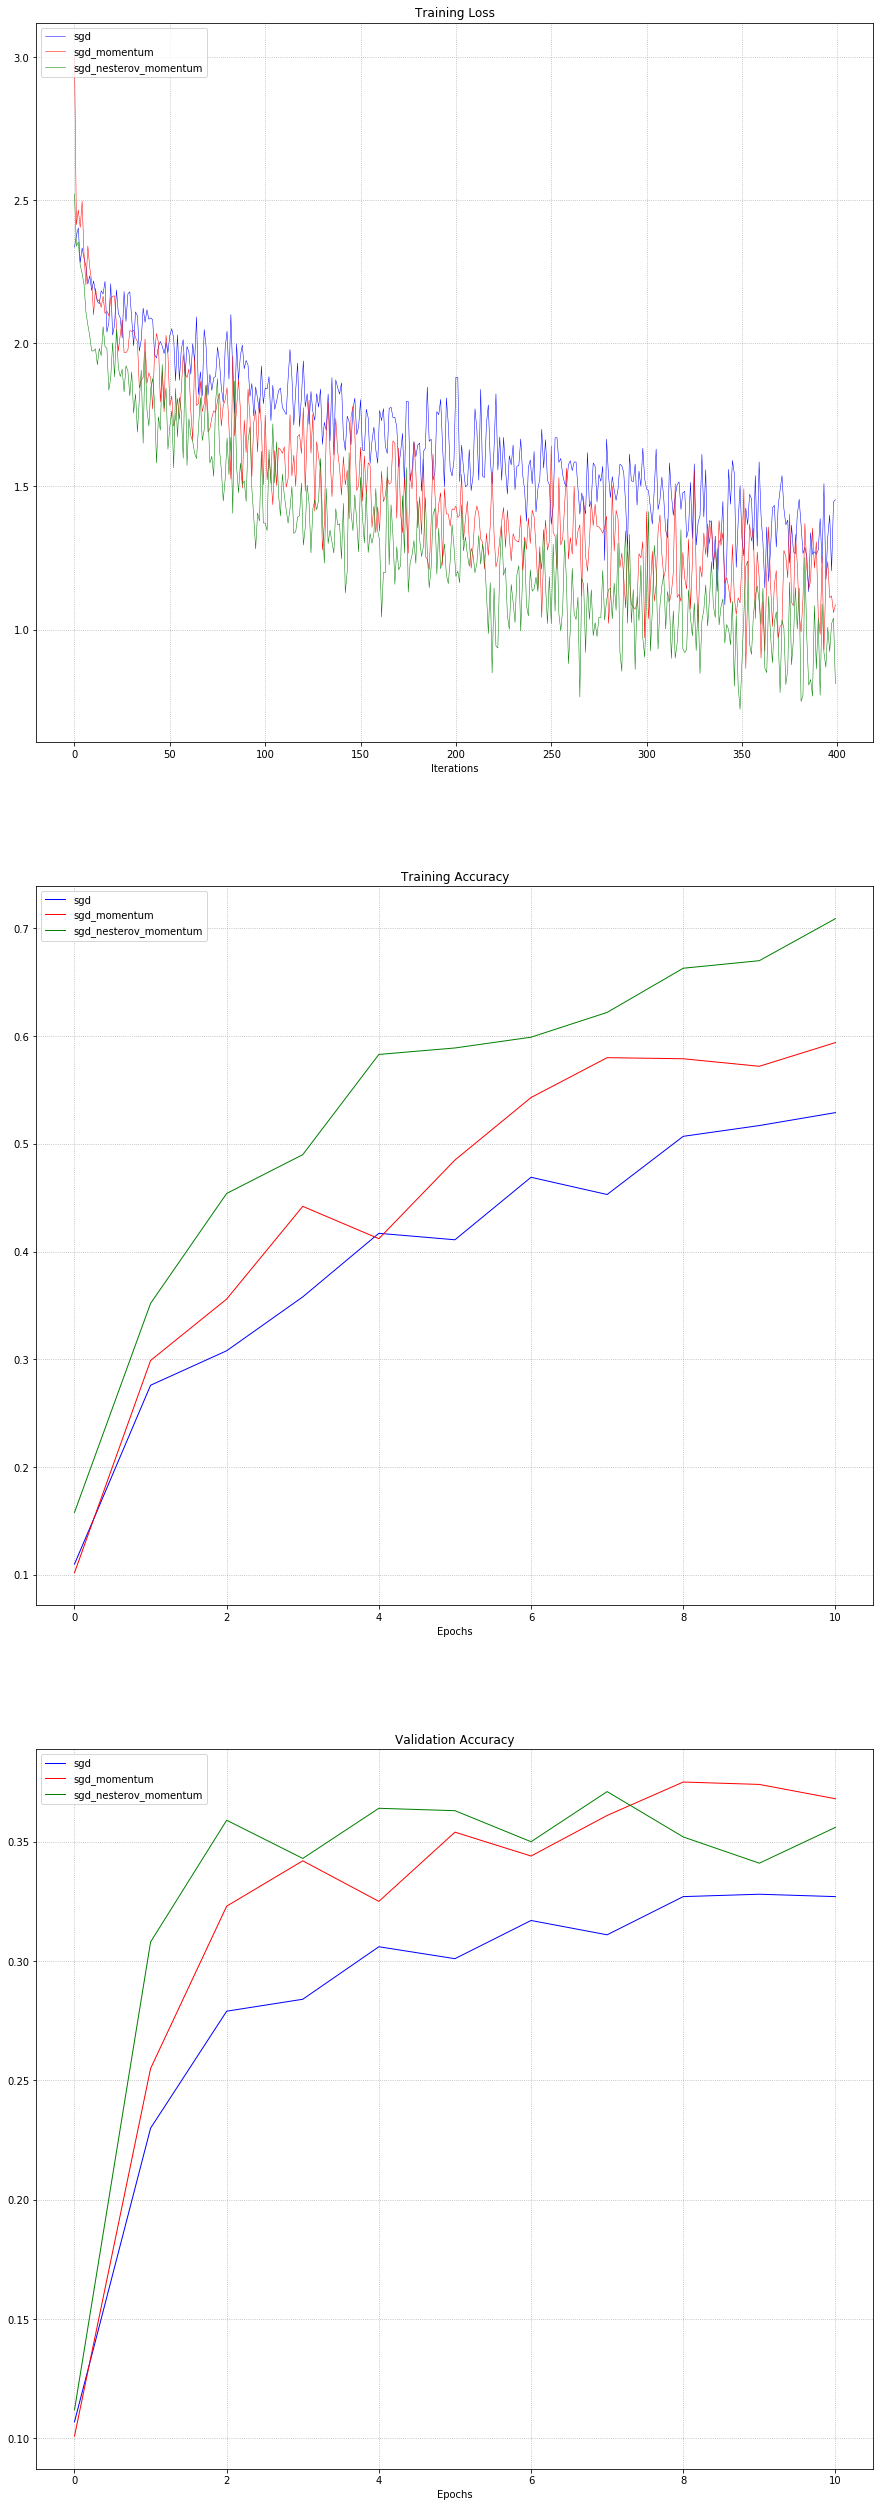

In [24]:
num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum', 'sgd_nesterov_momentum']:
  print('Optimizing with {}'.format(update_rule))
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=10, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': 1e-2,
                  },
                  verbose=False)
  solvers[update_rule] = solver
  solver.train()
  print

plt.subplot(3, 1, 1)
plt.title('Training Loss')
plt.xlabel('Iterations')

plt.subplot(3, 1, 2)
plt.title('Training Accuracy')
plt.xlabel('Epochs')

plt.subplot(3, 1, 3)
plt.title('Validation Accuracy')
plt.xlabel('Epochs')

for update_rule, solver in solvers.items():
  if update_rule == 'sgd':
    color = 'blue'
  elif update_rule == 'sgd_momentum':
    color = 'red'
  elif update_rule == 'sgd_nesterov_momentum':
    color = 'green'
  elif update_rule == 'adam':
    color = 'orange'
  elif update_rule == 'rmsprop':
    color = 'purple'
  plt.subplot(3, 1, 1)
  plt.grid(linestyle='dotted')
  plt.plot(solver.loss_history, label=update_rule, linewidth=0.5, color=color)
  
  plt.subplot(3, 1, 2)
  plt.grid(linestyle='dotted')
  plt.plot(solver.train_acc_history, label=update_rule, linewidth=1, color=color)

  plt.subplot(3, 1, 3)
  plt.grid(linestyle='dotted')
  plt.plot(solver.val_acc_history, label=update_rule, linewidth=1, color=color)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper left')
plt.gcf().set_size_inches(15, 45)
plt.show()


In [8]:
from nndl.optim import rmsprop

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
a = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'a': a}
next_w, _ = rmsprop(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print('next_w error: {}'.format(rel_error(expected_next_w, next_w)))
print('cache error: {}'.format(rel_error(expected_cache, config['a'])))


next_w error: 9.524687511038133e-08
cache error: 2.6477955807156126e-09


In [9]:
# Test Adam implementation; you should see errors around 1e-7 or less
from nndl.optim import adam

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
a = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'v': v, 'a': a, 't': 5}
next_w, _ = adam(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_a = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_v = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print('next_w error: {}'.format(rel_error(expected_next_w, next_w)))
print('a error: {}'.format(rel_error(expected_a, config['a'])))
print('v error: {}'.format(rel_error(expected_v, config['v'])))


next_w error: 1.1395691798535431e-07
a error: 4.208314038113071e-09
v error: 4.214963193114416e-09


Optimizing with adam
Optimizing with rmsprop


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


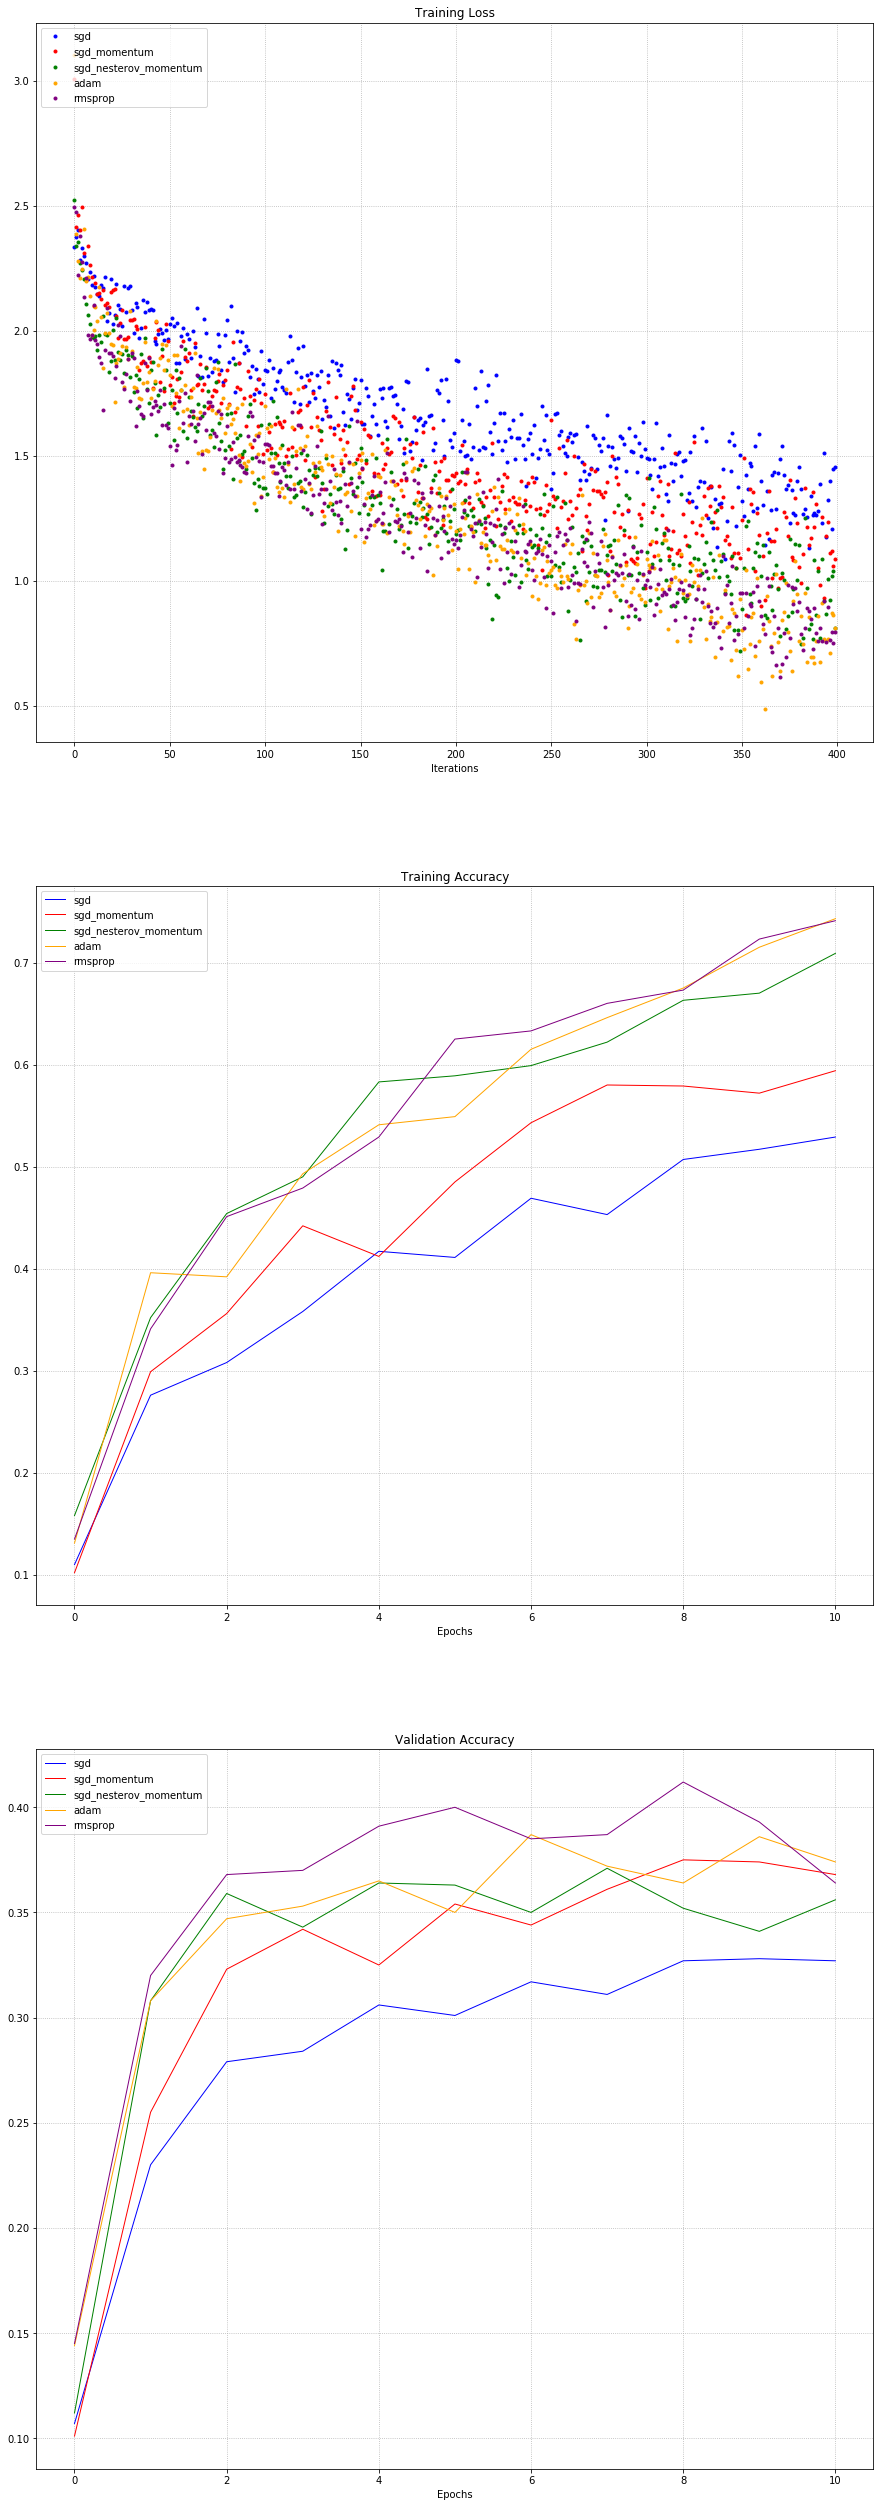

In [25]:
learning_rates = {'rmsprop': 2e-4, 'adam': 1e-3}

for update_rule in ['adam', 'rmsprop']:
  print('Optimizing with {}'.format(update_rule))
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=10, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=False)
  solvers[update_rule] = solver
  solver.train()
  print

plt.subplot(3, 1, 1)
plt.title('Training Loss')
plt.xlabel('Iterations')

plt.subplot(3, 1, 2)
plt.title('Training Accuracy')
plt.xlabel('Epochs')

plt.subplot(3, 1, 3)
plt.title('Validation Accuracy')
plt.xlabel('Epochs')

for update_rule, solver in solvers.items():
  if update_rule == 'sgd':
    color = 'blue'
  elif update_rule == 'sgd_momentum':
    color = 'red'
  elif update_rule == 'sgd_nesterov_momentum':
    color = 'green'
  elif update_rule == 'adam':
    color = 'orange'
  elif update_rule == 'rmsprop':
    color = 'purple'

  plt.subplot(3, 1, 1)
  plt.grid(linestyle='dotted')
  plt.plot(solver.loss_history, '.', label=update_rule, linewidth=0.5, color=color)
  
  plt.subplot(3, 1, 2)
  plt.grid(linestyle='dotted')
  plt.plot(solver.train_acc_history, label=update_rule, linewidth=1, color=color)

  plt.subplot(3, 1, 3)
  plt.grid(linestyle='dotted')
  plt.plot(solver.val_acc_history, label=update_rule, linewidth=1, color=color)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper left')
plt.gcf().set_size_inches(15, 45)
plt.show()
